In [ ]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Our custom libraries!
import sys
sys.path.append("..")
# from ds_utils.sample_data import *

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 12

### PART A1
For this part of the project, you will analyze the TelCo CHURN data set.
Divide the entire data set into training and test sets (the test set should be
25% of the original data set)

In [ ]:
df=pd.read_csv('C:/Users/cr/Documents/RutgersCoursework2022/Machine Learning Apllications/Python/Data/churn2 (1).csv')
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [ ]:
df.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE'],
      dtype='object')

In [ ]:
#Checking For null values
df.isnull()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking for null values in each column
df.isnull().any()

COLLEGE                        False
INCOME                         False
OVERAGE                        False
LEFTOVER                       False
HOUSE                          False
HANDSET_PRICE                  False
OVER_15MINS_CALLS_PER_MONTH    False
AVERAGE_CALL_DURATION          False
REPORTED_SATISFACTION          False
REPORTED_USAGE_LEVEL           False
CONSIDERING_CHANGE_OF_PLAN     False
LEAVE                          False
dtype: bool

In [ ]:
#Checking for data types of each column
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
dtype: object

In [ ]:
df['REPORTED_SATISFACTION'].unique()

array(['unsat', 'very_unsat', 'very_sat', 'avg', 'sat'], dtype=object)

In [ ]:
df['REPORTED_USAGE_LEVEL'].unique()

array(['little', 'very_little', 'very_high', 'high', 'avg'], dtype=object)

In [ ]:
df['CONSIDERING_CHANGE_OF_PLAN'].unique()

array(['no', 'considering', 'perhaps', 'never_thought',
       'actively_looking_into_it'], dtype=object)

In [ ]:
df['LEAVE'].unique()

array(['STAY', 'LEAVE'], dtype=object)

In [ ]:
df['COLLEGE'].unique()

array(['zero', 'one'], dtype=object)

In [ ]:
# Converting categorical datatypes to Numerical(College,Leave)
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)
df = df.drop("LEAVE", axis="columns")
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,1
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,1


In [ ]:
#df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
df = df.drop("COLLEGE", axis="columns")
df.head(5)

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE2,COLLEGE2
0,31953,0,6,313378,161,0,4,unsat,little,no,1,0
1,36147,0,13,800586,244,0,6,unsat,little,considering,1,1
2,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,1,1
3,120070,38,33,788235,780,3,2,unsat,very_high,considering,0,0
4,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,1,1


In [ ]:
# Converting categorical datatypes to Numerical(REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN)

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object and fit it to the data
le = LabelEncoder()
le.fit(df['REPORTED_SATISFACTION'])

# Transform the data using the encoder
encodedvalue1 = le.transform(df['REPORTED_SATISFACTION'])
df['REPORTED_SATISFACTION']= encodedvalue1



In [ ]:
df.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE2,COLLEGE2
0,31953,0,6,313378,161,0,4,2,little,no,1,0
1,36147,0,13,800586,244,0,6,2,little,considering,1,1
2,27273,230,0,305049,201,16,15,2,very_little,perhaps,1,1
3,120070,38,33,788235,780,3,2,2,very_high,considering,0,0
4,29215,208,85,224784,241,21,1,4,little,never_thought,1,1


In [ ]:
le.fit(df['REPORTED_USAGE_LEVEL'])
encodevalue2= le.transform(df['REPORTED_USAGE_LEVEL'])
df['REPORTED_USAGE_LEVEL']= encodevalue2

In [ ]:
le.fit(df['CONSIDERING_CHANGE_OF_PLAN'])
encodevalue3= le.transform(df['CONSIDERING_CHANGE_OF_PLAN'])
df['CONSIDERING_CHANGE_OF_PLAN']= encodevalue3

In [ ]:
df.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE2,COLLEGE2
0,31953,0,6,313378,161,0,4,2,2,3,1,0
1,36147,0,13,800586,244,0,6,2,2,1,1,1
2,27273,230,0,305049,201,16,15,2,4,4,1,1
3,120070,38,33,788235,780,3,2,2,3,1,0,0
4,29215,208,85,224784,241,21,1,4,2,2,1,1


## Splitting the data into test and train sets

In [ ]:
# Names of different columns
# EXAMPLE 1 for Jupyter notebook change below: change the predictor_cols to something else...
#DF WITH predictor_cols = X
#target_col = Y
Y= df["LEAVE2"]
X= df.drop('LEAVE2', axis= "columns")

from sklearn.model_selection import train_test_split

# EXAMPLE 2 for Jupyter notebook change below:  USE ONLY 25% of the total data as the TEST set..
# EXAMPLE 3 below.  Change random_state = 42 (or something else)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 11)
X_test shape: (5000, 11)
y_train shape: (15000,)
y_test shape: (5000,)


##PART A Deliverable: Apply 10-fold cross-validation to build TWO distinct
models to predict customer CHURN. The two techniques are a) Decision
Trees and b) Logistic Regression. Use the best combination of predictor
variables for this purpose (ok to use the variables in the Lab notebook for
Decision trees).

1) ##  Appendix A2 Decision Tree Model

In [ ]:
# Let's define the model (tree),cross validating the model,fitting the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

my_decision_tree_model = DecisionTreeClassifier(max_depth=4, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1)

scores_d = cross_val_score(my_decision_tree_model,X_train,y_train, cv = 10)

# Let's tell the model what is the data
my_decision_tree_model.fit(X_train, y_train)
print(my_decision_tree_model)

print("Cross validation scores: {}".format(scores_d))
print("Average cross validation score: {:.2f}".format(scores_d.mean()))
print("Std. dev of cross validation score: {:.2f}".format(scores_d.std()))
print("Minimum of cross validation score: {:.2f}".format(scores_d.min()))


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=12)
Cross validation scores: [0.706      0.70133333 0.70733333 0.67266667 0.68133333 0.70933333
 0.706      0.686      0.70266667 0.704     ]
Average cross validation score: 0.70
Std. dev of cross validation score: 0.01
Minimum of cross validation score: 0.67


In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 11)
X_test shape: (5000, 11)
y_train shape: (15000,)
y_test shape: (5000,)


In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    directory1 = directory[2:]
    os.system("mkdir %s" %(directory1))
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,feature_names=feature_names,class_names=class_names,
                               proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    print(dot_name)
    print(image_name)
    #os.system("dot -Tpng %s  -o %s" % (dot_name, image_name))
    os.system("dot -Tpng %s  -o %s" % (dot_name, image_name))

    return Image(filename=image_name)


./images/tree.dot
./images/tree.png


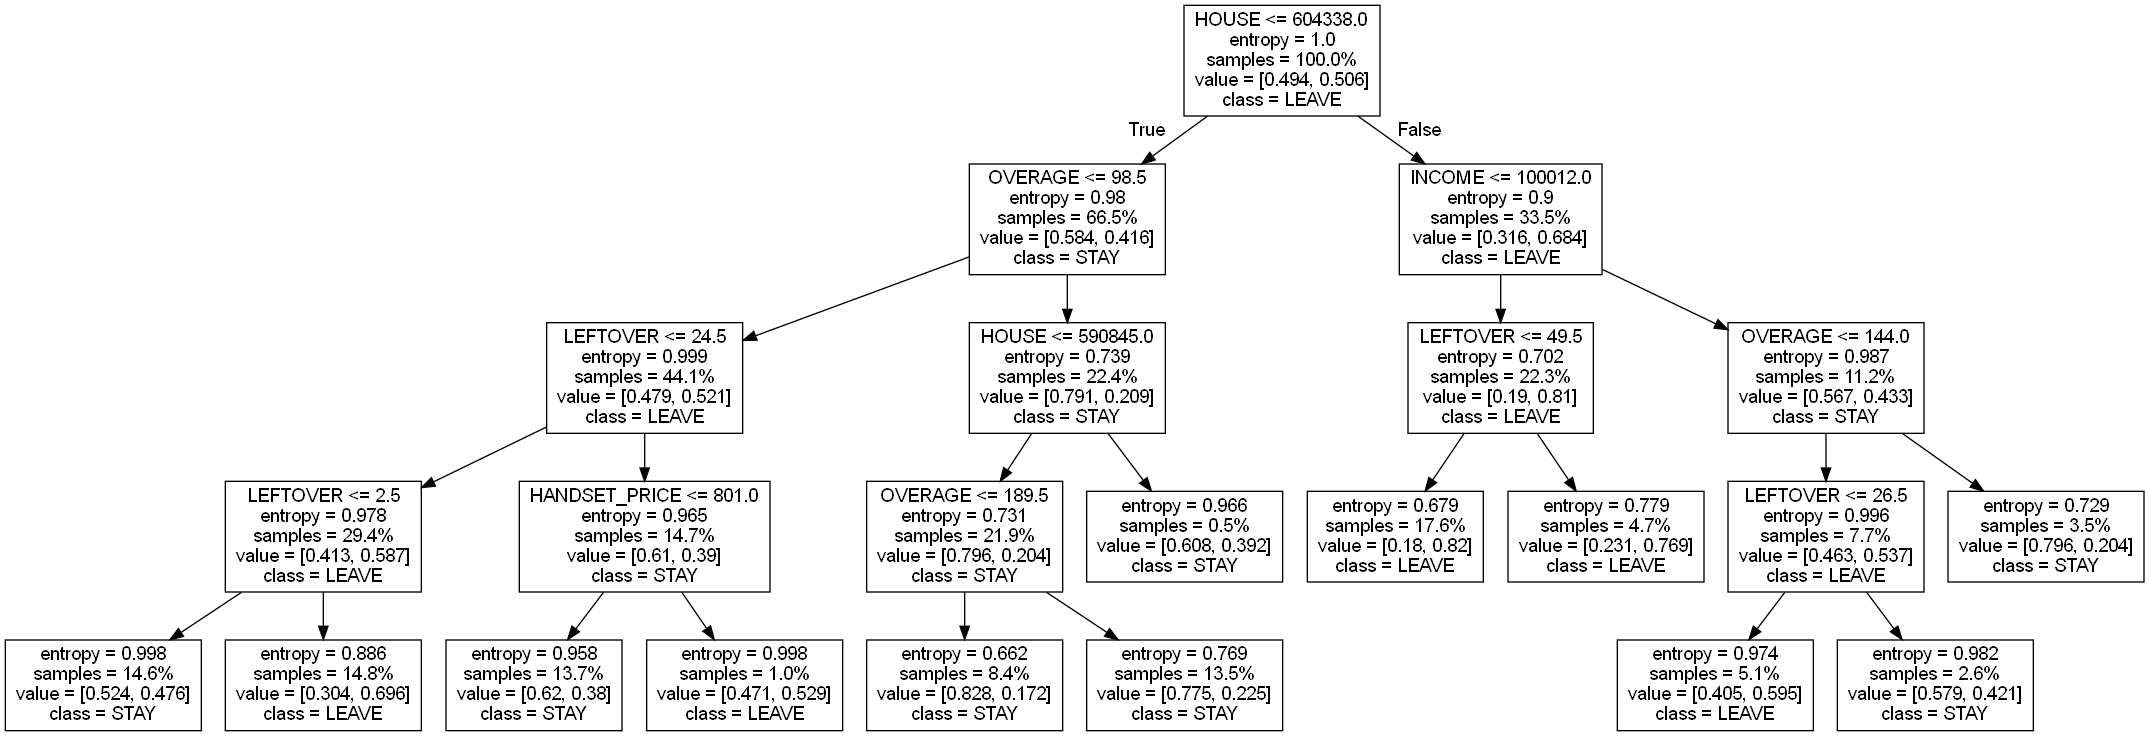

In [ ]:
my_decision_tree_model.fit(X_train, y_train)
visualize_tree(my_decision_tree_model, X.columns, ['STAY', 'LEAVE'])

2. ## Appendix A3 Logistic Regression Model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 10000)
scores_lr = cross_val_score(logreg,X_train,y_train, cv = 10)
logreg.fit(X, Y)

print(logreg)
print("Cross validation scores: {}".format(scores_lr))

print("Average cross validation score: {:.2f}".format(scores_lr.mean()))
print("Std. dev of cross validation score: {:.2f}".format(scores_lr.std()))
print("Minimum of cross validation score: {:.2f}".format(scores_lr.min()))

LogisticRegression(max_iter=10000)
Cross validation scores: [0.6        0.632      0.63466667 0.64533333 0.628      0.638
 0.64       0.63333333 0.63066667 0.62533333]
Average cross validation score: 0.63
Std. dev of cross validation score: 0.01
Minimum of cross validation score: 0.60


In [ ]:
# Storing the accuracy scores
new_df = pd.DataFrame()
new_df['DT Accuracy'] = scores_d
new_df['LR Accuracy'] = scores_lr


In [ ]:
new_df
#new_df.to_csv('Accuracy_table.csv')

,DT Accuracy,LR Accuracy
0,0.706000,0.600000
1,0.701333,0.632000
2,0.707333,0.634667
3,0.672667,0.645333
4,0.681333,0.628000
5,0.709333,0.638000
6,0.706000,0.640000
7,0.686000,0.633333
8,0.702667,0.630667
9,0.704000,0.625333


## Confusion Matrix

In [ ]:
# Make and fit a model on the training data
logreg = LogisticRegression(C=1000000, solver='liblinear')
logreg.fit(X,Y)

# Get probabilities of being a (We saw this last class !!)
probabilities = logreg.predict_proba(X_test)[:, 1]

print(probabilities)

[0.30401808 0.32242822 0.72183081 ... 0.25203562 0.58169264 0.38131744]


In [ ]:
Y_predictions = probabilities > .5
print(Y_predictions)

[False False  True ... False  True False]


In [ ]:
print(y_test)

10650    0
2041     0
8668     0
1114     0
13902    0
        ..
3761     0
5478     0
5805     0
10084    1
13494    0
Name: LEAVE2, Length: 5000, dtype: int32


In [ ]:
Y_actual = y_test.tolist()

In [ ]:
CM = metrics.confusion_matrix(Y_actual,Y_predictions,labels = [1,0]).T

print(CM)

[[1672  907]
 [ 891 1530]]


In [ ]:
cm_df = pd.DataFrame(CM, columns=['p', 'n'], index=['Y', 'N'])
print (cm_df)

      p     n
Y  1672   907
N   891  1530


In [ ]:
sum_n = cm_df['n'].sum()

In [ ]:
false_p = cm_df.loc['Y', 'n']

In [ ]:
false_pr = false_p/sum_n
print(false_pr)

0.37217890849405005
